In [4]:
# Als je `import clusterizer` typt, dan zoekt Python naar mappen en .py-bestanden met die naam.
# De plekken waar python gaat zoeken staan in de lijst `sys.path`.
# Omdat we nu in SCG-analyse/notebooks zitten, moeten we de bovenliggende map (`SCG-analyse`)
# toevoegen aan de lijst van zoekplekken.
import sys
if "../.." not in sys.path:
    sys.path.append("../..")

# Hiermee wordt de clusterizer module herladen wanneer een bestand ervan verandert
# (handig als je aan de module aan het werken bent).
# Als je dit niet doet, wordt de code (zoals circuit.py, plot.py, etc) alleen geladen wanneer
# je `import clusterizer` typt. 
%load_ext autoreload
%autoreload 2


import clusterizer

import matplotlib.pyplot as plt

# Nodig om een np.datetime64 tijdstip (zoals in de partial_discharges DataFrame) 
# als ascoordinaat te gebruiken.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np
import scipy.stats as stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
circnum = clusterizer.globals.available_circuits[5]

circuitje=clusterizer.circuit.MergedCircuit(circnum)
circuitje.build()

In [60]:
locations = circuitje.pd["Location in meters (m)"][circuitje.pd_occured].values
times = circuitje.pd["Date/time (UTC)"][circuitje.pd_occured].values
locations_half = locations[times < np.datetime64("2018-06","ns")]

sorted_locs = sorted(locations_half)
diffs = np.array(sorted_locs)[1:] - np.array(sorted_locs)[:-1]

<IPython.core.display.Javascript object>


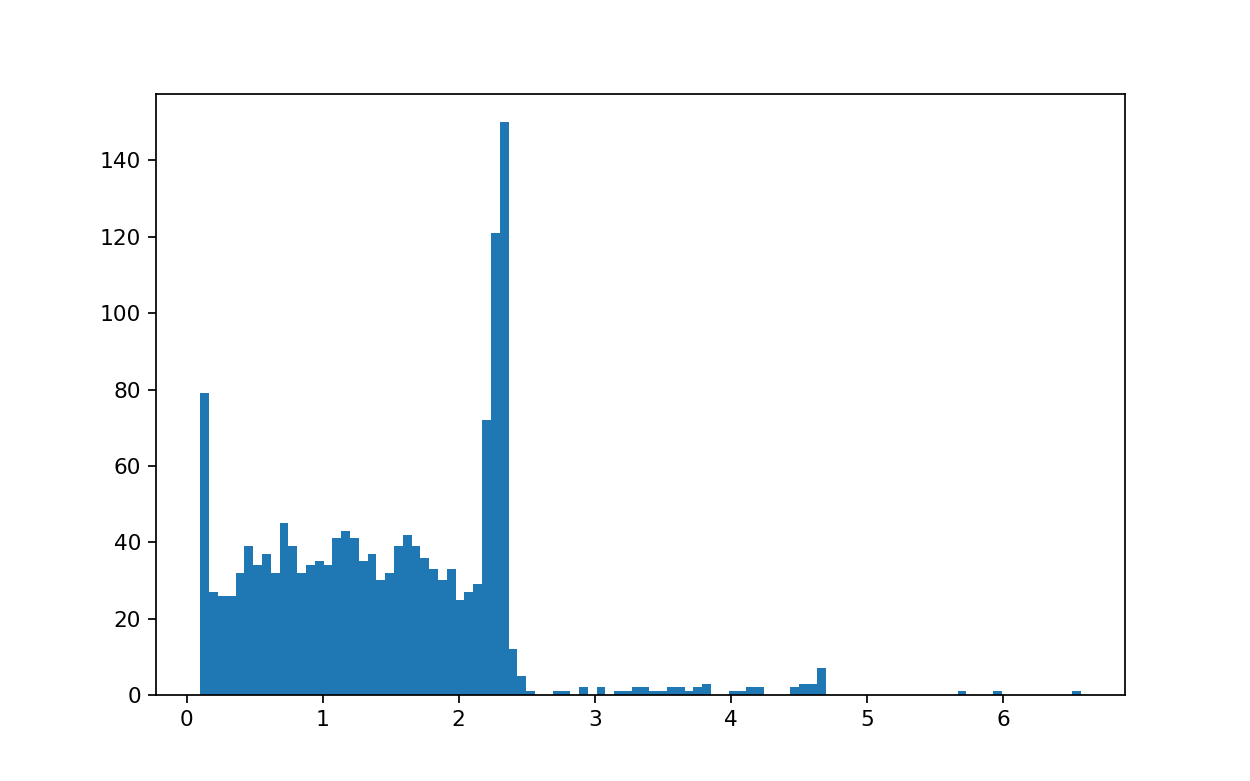

In [56]:
%matplotlib notebook
fig, ax = plt.subplots()

ax.hist(diffs[np.logical_and(0.1<diffs,diffs<10)],bins=100)

fig.show()
#plt.savefig("mooifiguurtje.pdf")

<IPython.core.display.Javascript object>


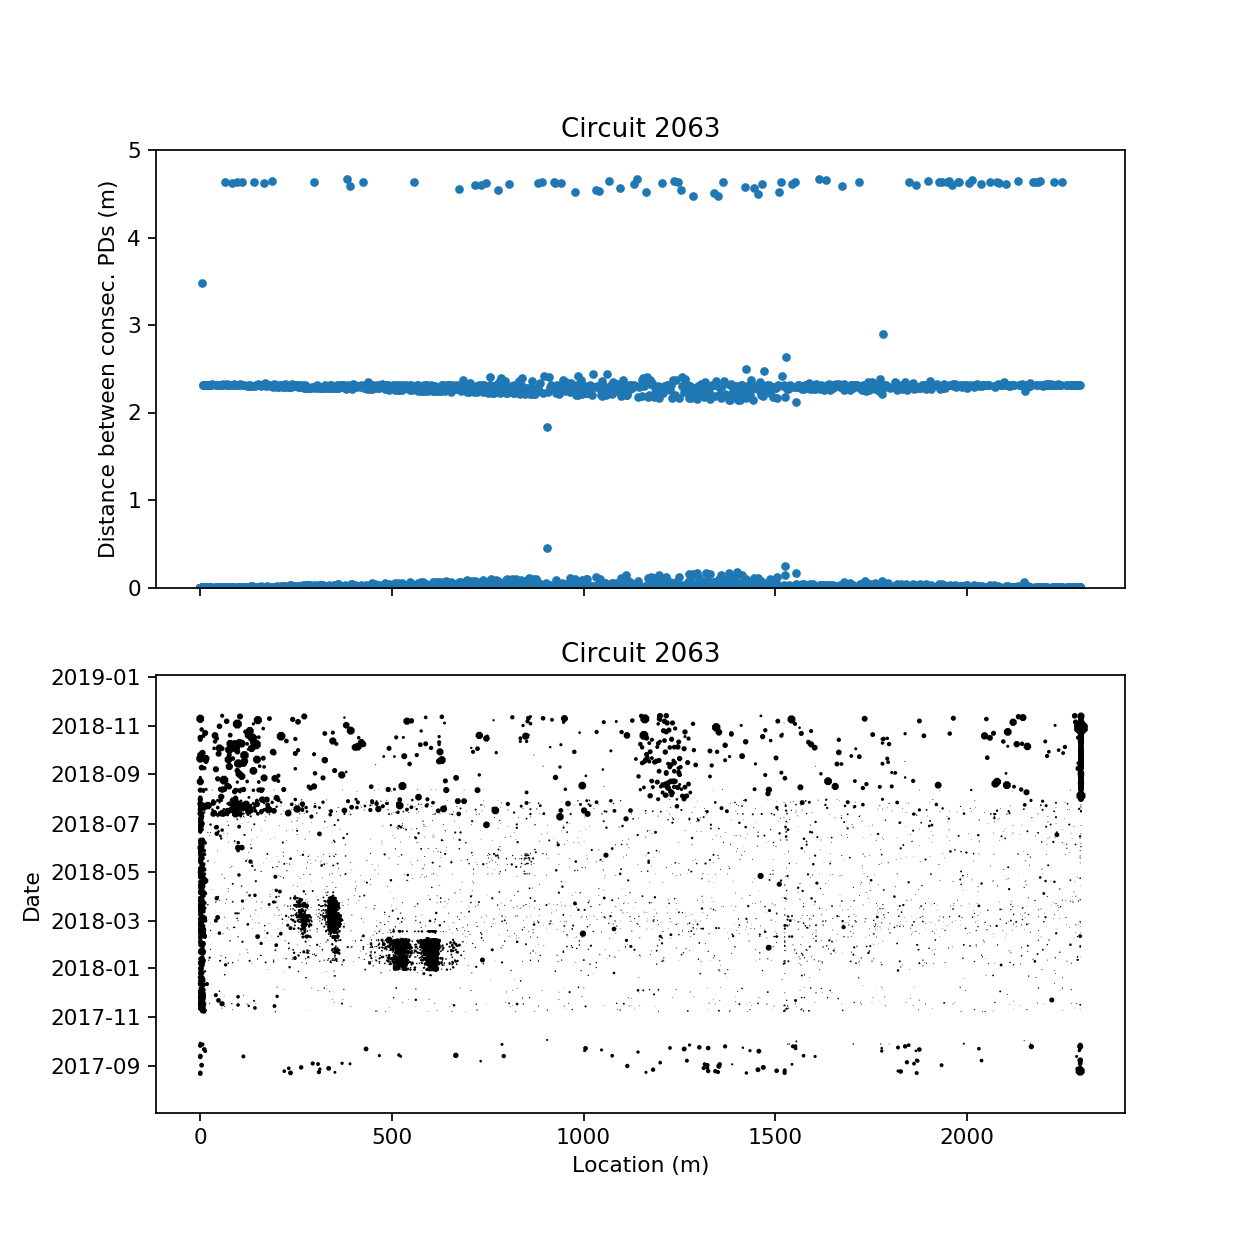

In [61]:
%matplotlib notebook

fig, ax = plt.subplots(2,1, sharex = True, figsize=(8,8))


ax[0].set_title("Circuit {0}".format(circnum))
clusterizer.plot.draw_location_time_scatter(circuitje, ax=ax[1])

ax[0].plot(sorted_locs[1:], diffs, '.')
ax[0].set_ylabel("Distance between consec. PDs (m)")

ax[0].set_ylim(0,5)

fig.show()